## Importing the required dependencies

In [27]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [3]:
# Import train & test data 
train = pd.read_csv(r'D:\data\hacker\new\Dataset\train.csv')
test = pd.read_csv(r'D:\data\hacker\new\Dataset\test.csv')

## Rows x Columns in data

In [4]:

print("training data shape: ",train.shape)
print("test data shape: ",test.shape)

training data shape:  (9798, 9)
test data shape:  (5763, 8)


In [5]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


## Columns in training data

In [6]:
train.columns

Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'Low_Cap_Price',
       'High_Cap_Price'],
      dtype='object')

## Cross check data type

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           9798 non-null   object 
 1   Date              9798 non-null   object 
 2   State_of_Country  9798 non-null   int64  
 3   Market_Category   9798 non-null   int64  
 4   Product_Category  9798 non-null   int64  
 5   Grade             9798 non-null   int64  
 6   Demand            9798 non-null   float64
 7   Low_Cap_Price     9798 non-null   int64  
 8   High_Cap_Price    9798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           5763 non-null   object 
 1   Date              5763 non-null   object 
 2   State_of_Country  5763 non-null   int64  
 3   Market_Category   5763 non-null   int64  
 4   Product_Category  5763 non-null   int64  
 5   Grade             5763 non-null   int64  
 6   Demand            5763 non-null   float64
 7   High_Cap_Price    5763 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 360.3+ KB


## Descriptive statistics

In [9]:
train.describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


## Seperating columns

In [10]:
df_num =  train[['Demand', 'Low_Cap_Price', 'High_Cap_Price']]
df_cat =  train[['State_of_Country','Market_Category', 'Product_Category', 'Grade']]

## numerical columns histogram

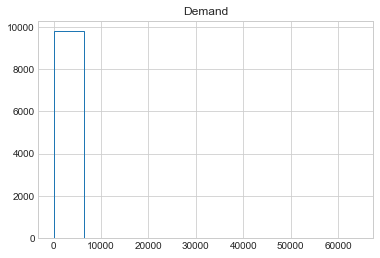

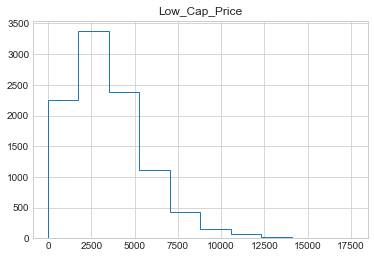

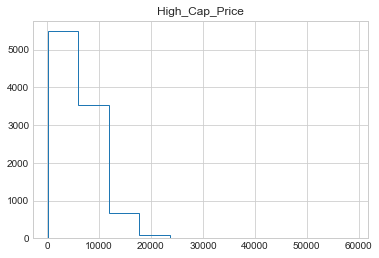

In [12]:
for i in df_num.columns:
    plt.hist(df_num[i],histtype=u'step')
    plt.title(i)
    plt.show()

## Correlation among features

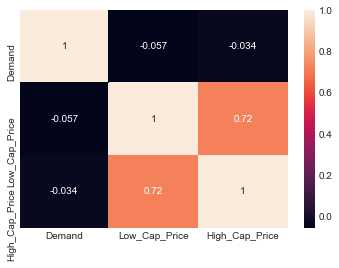

In [14]:
sns.heatmap(df_num.corr(),annot=True)

## Categorical columns bar graph

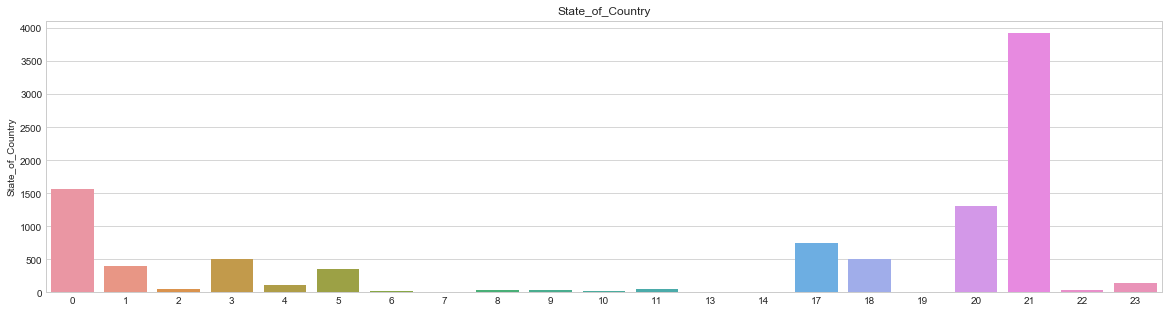

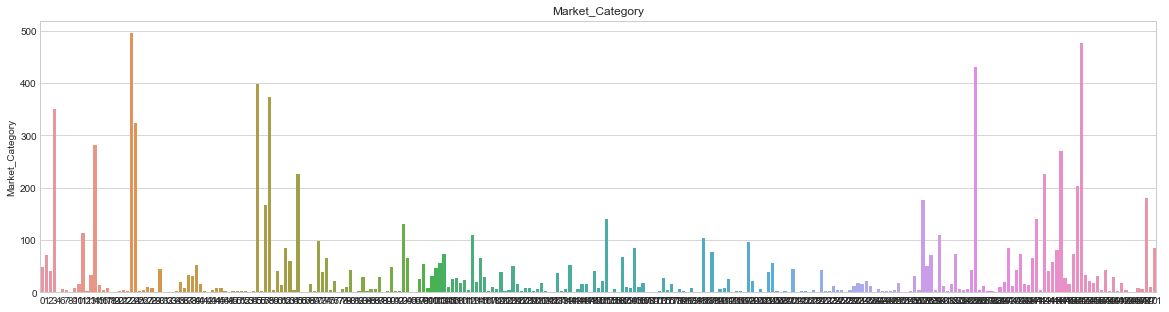

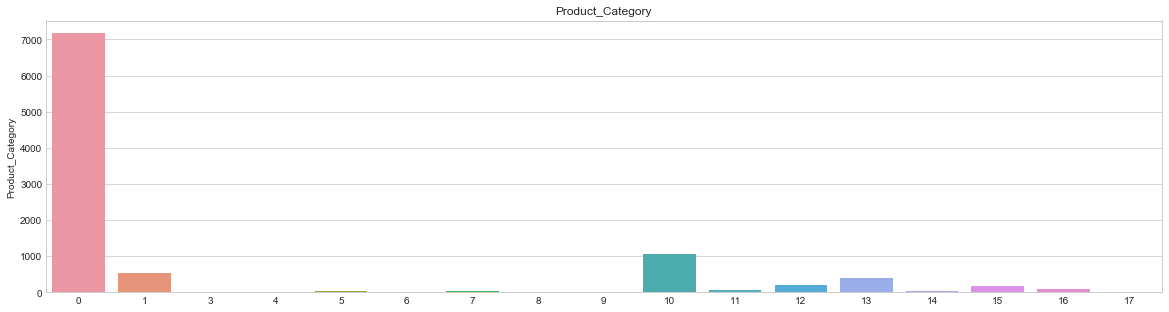

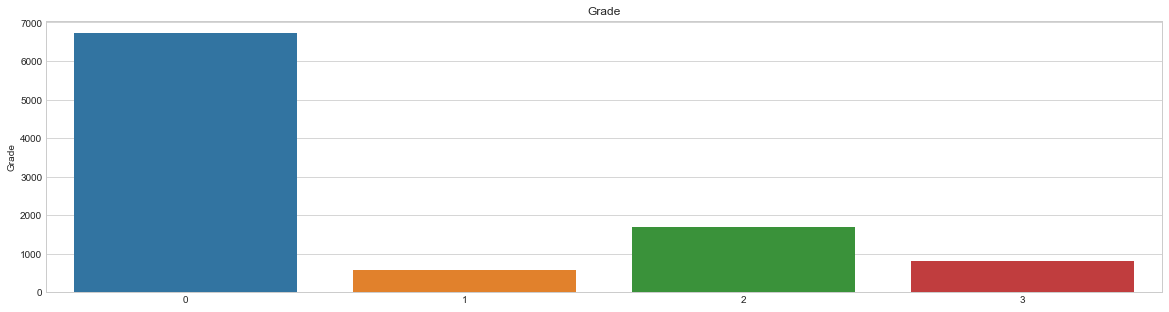

In [19]:
for i in df_cat.columns:
    fig = plt.figure(figsize=(20,5))
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

## Cross check Null values

In [20]:
train.isna().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [21]:
test.isna().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
High_Cap_Price      0
dtype: int64

## Making copies of data

In [22]:
df_train = train.copy()
df_test=test.copy()

In [23]:
df_train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


## Dropping columns

In [24]:
df_train.drop(['Item_Id','Date'],axis=1,inplace=True)

In [25]:
df_test.drop(['Item_Id','Date'],axis=1,inplace=True)

## Splitting data

In [26]:
X_train = df_train.drop('Low_Cap_Price', axis=1) # data
y_train = df_train['Low_Cap_Price'] # labels
X_test = df_test

## Pipeline

In [28]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',Ridge())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -1931634.600537 (1309303.073528)
ScaledLASSO: -1931662.115227 (1309233.638304)
ScaledRIDGE: -1931632.270785 (1309213.210651)
ScaledKNN: -1673682.773732 (1267060.160901)
ScaledDT: -1637608.305261 (1065309.515541)
ScaledGBM: -1105036.883525 (852991.059073)
ScaledRF: -1045184.801765 (788013.433436)
ScaledSVR: -4074907.798661 (2490061.970915)


## Finding Best parameters

In [29]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
model =RandomForestRegressor()
kfold =KFold(n_splits=10, random_state=21,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -697291.669055 using {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 300}


In [30]:
grid_result.best_estimator_

RandomForestRegressor(max_features='log2', min_samples_split=8,
                      n_estimators=300)

## Training Model

In [31]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

fin_model = RandomForestRegressor(max_features='sqrt', min_samples_split=8,
                      n_estimators=300)

fin_model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = fin_model.predict(rescaled_X_test)

## Feature Selection

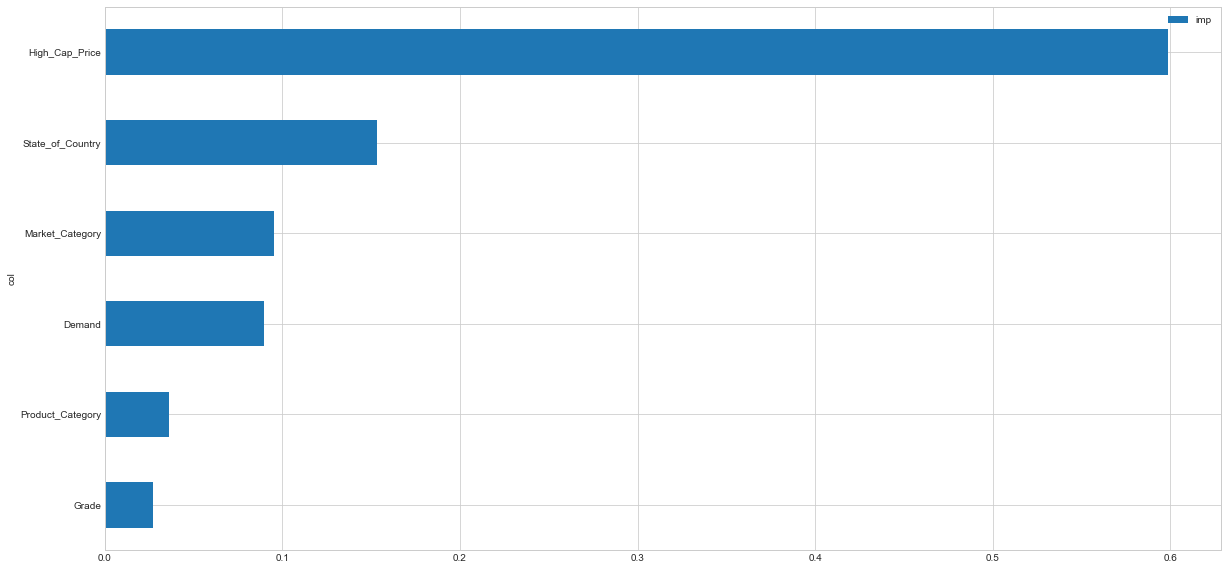

In [32]:
def feature_importance(model, data):
    
    fea_imp = pd.DataFrame({'imp': fin_model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True,False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

# Plot the feature importance scores
feature_importances = feature_importance(model, X_train)

In [33]:
feature_importances = feature_importances.sort_values(['imp'],ascending=False)

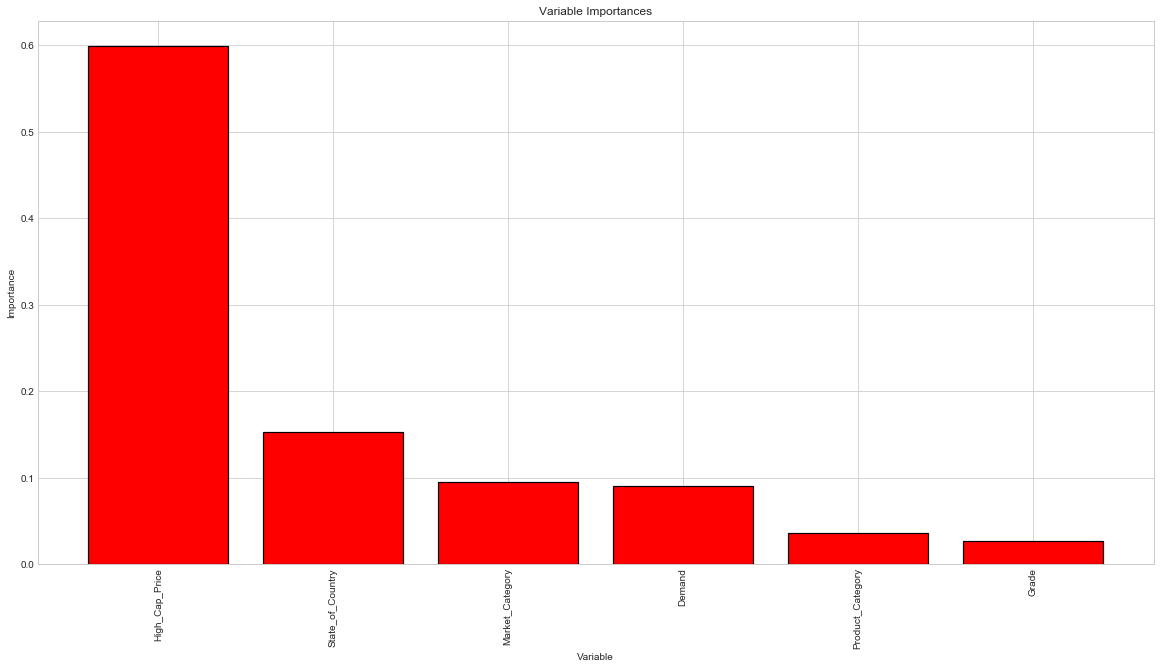

In [34]:
x_values = list(range(len(feature_importances.imp)))# Make a bar chart
fig = plt.figure(figsize=(20,10))
plt.bar(x_values, feature_importances.imp, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feature_importances.col, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

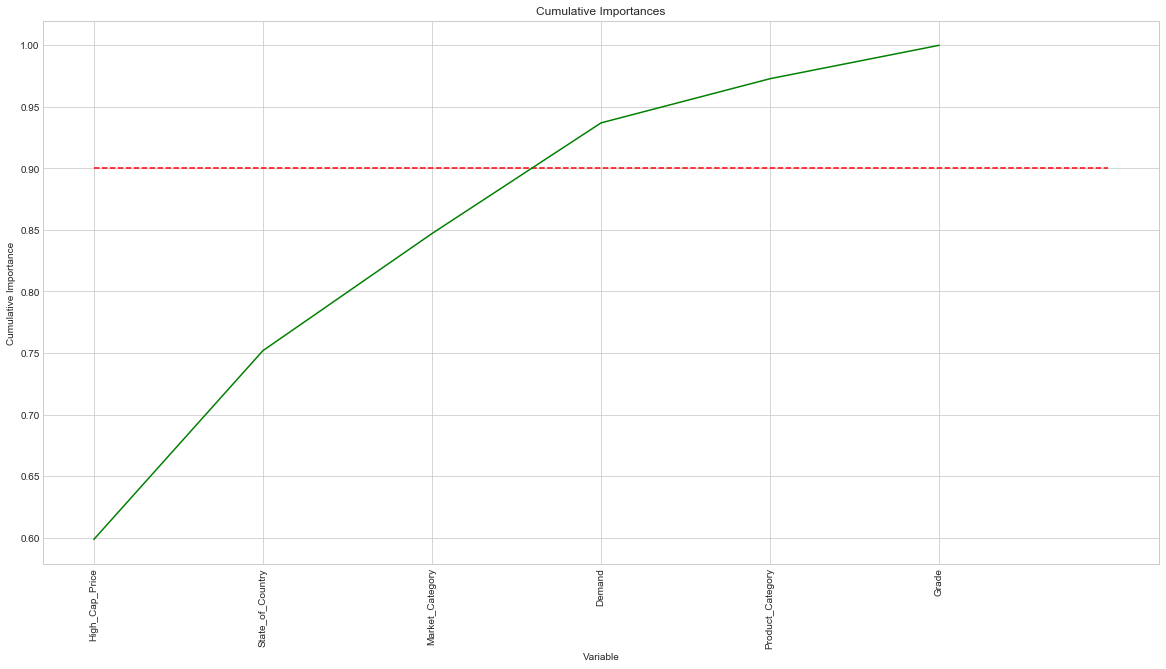

In [35]:

sorted_importances = [importance for importance in feature_importances.imp]

sorted_features = [importance for importance in feature_importances.col]# Cumulative importances


cumulative_importances = np.cumsum(sorted_importances)# Make a line graph
fig = plt.figure(figsize=(20,10))
plt.plot(x_values, cumulative_importances, 'g-')# Draw line at 90% of importance retained

plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')# Format x ticks and labels

plt.xticks(x_values, sorted_features, rotation = 'vertical')# Axis labels and title

plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [36]:
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 4


In [37]:
important_feature_names = [feature for feature in feature_importances.col[:6]]


important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (9798, 6)
Important test features shape: (5763, 6)


In [38]:
fin_model.fit(important_train_features, y_train)
# Make predictions on test data
final_predictions = fin_model.predict(important_test_features)